In [3]:
#모델활용>Isolation Forest
#중복
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 불러오기
df = pd.read_csv('winequality-red.csv')

# 중복된 데이터 제거
df = df.drop_duplicates()

In [4]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np

# Isolation Forest 모델 생성
clf = IsolationForest(contamination=0.05)  # 이상치 비율을 조절할 수 있음

# 각 독립변수에 대한 이상치 탐지
outliers = {}
inliers = {}

for column in df.columns[:-1]:  # 종속변수는 제외
    X = df[[column]].values
    clf.fit(X)
    outliers[column] = clf.predict(X)
    inliers[column] = clf.decision_function(X)

# 결과 출력
for column in df.columns[:-1]:
    print(f"Outliers in {column}: {sum(outliers[column] == -1)}")

Outliers in fixed acidity: 64
Outliers in volatile acidity: 66
Outliers in citric acid: 66
Outliers in residual sugar: 67
Outliers in chlorides: 68
Outliers in free sulfur dioxide: 59
Outliers in total sulfur dioxide: 67
Outliers in density: 68
Outliers in pH: 68
Outliers in sulphates: 68
Outliers in alcohol: 64


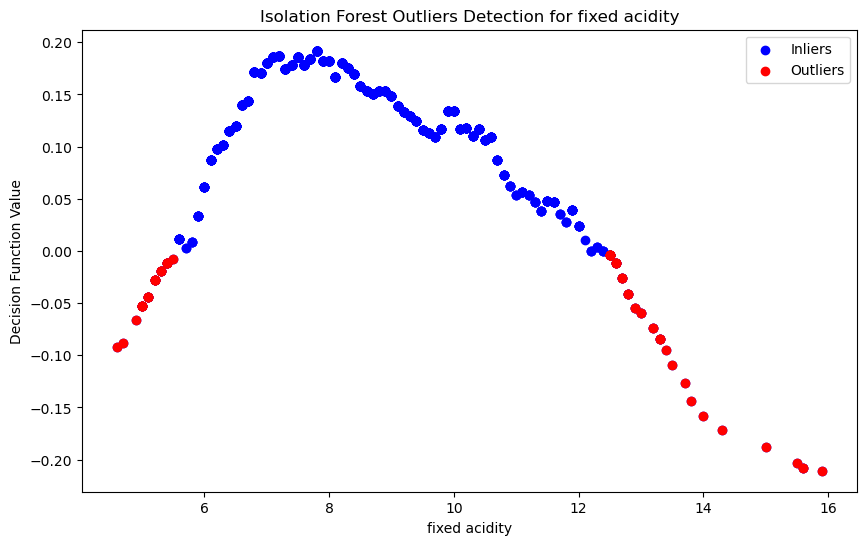

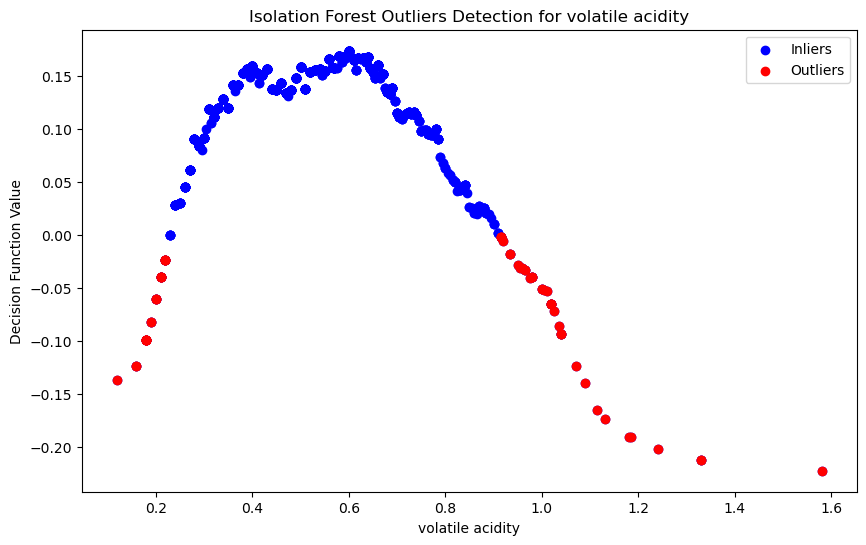

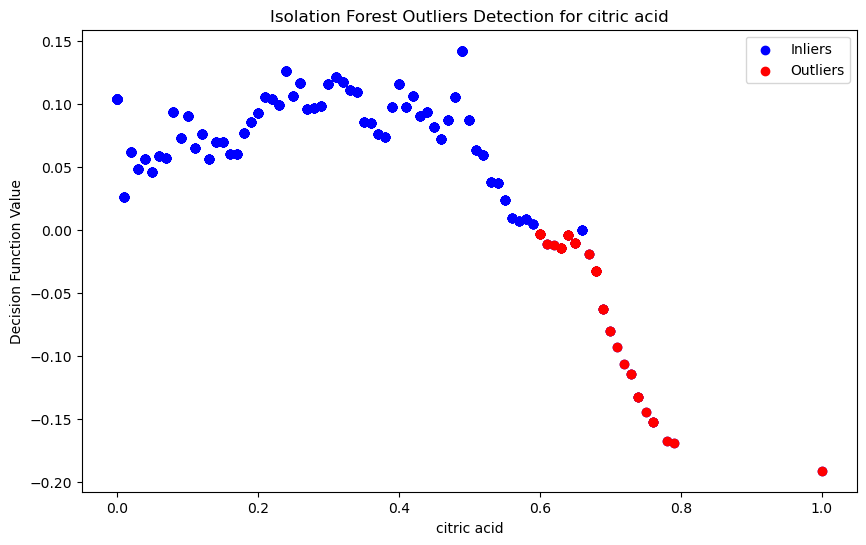

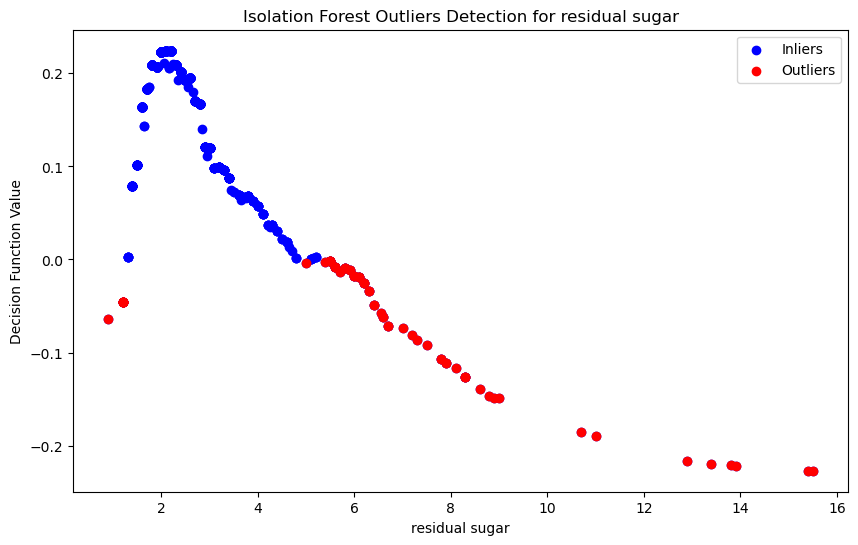

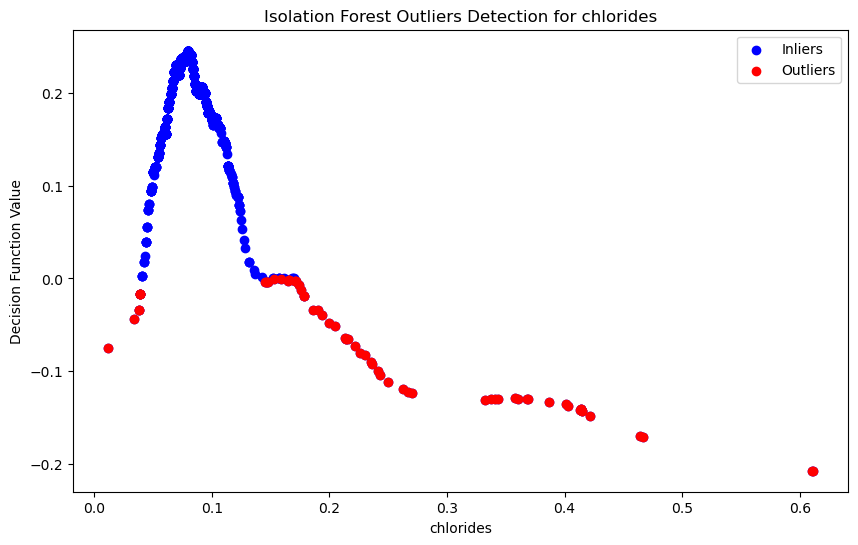

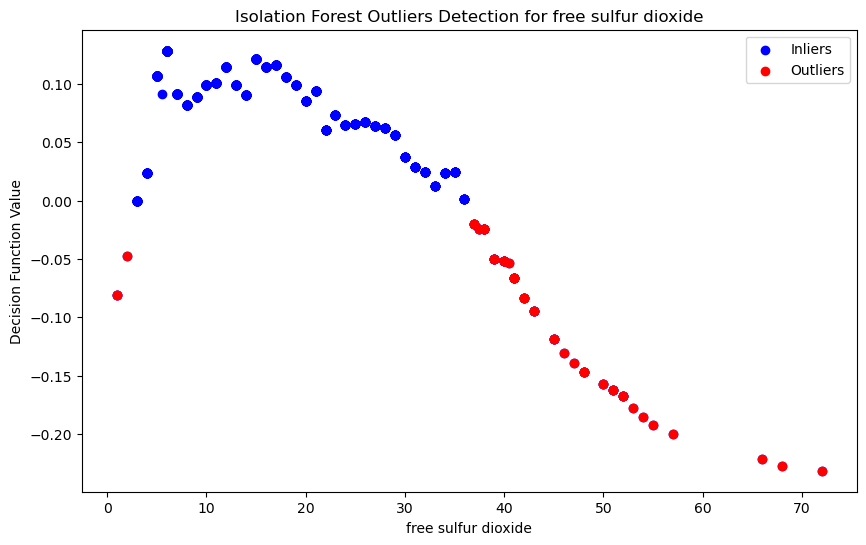

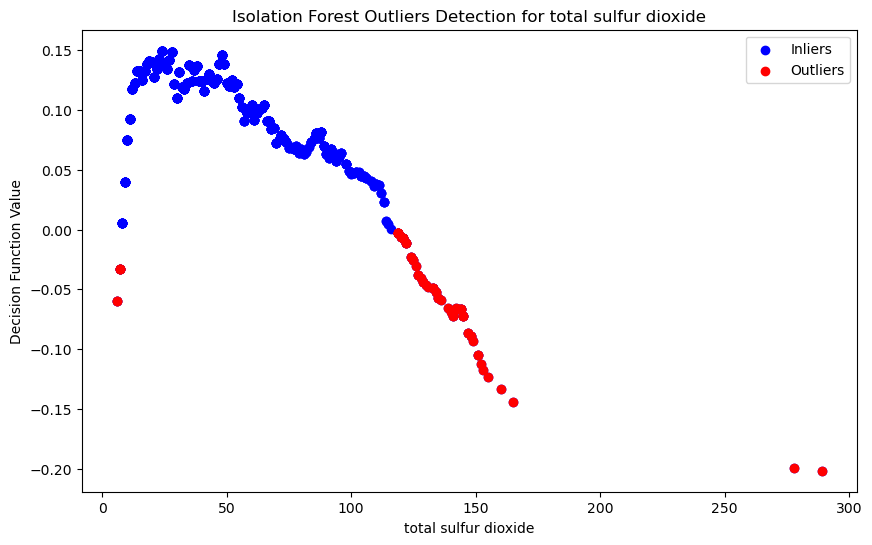

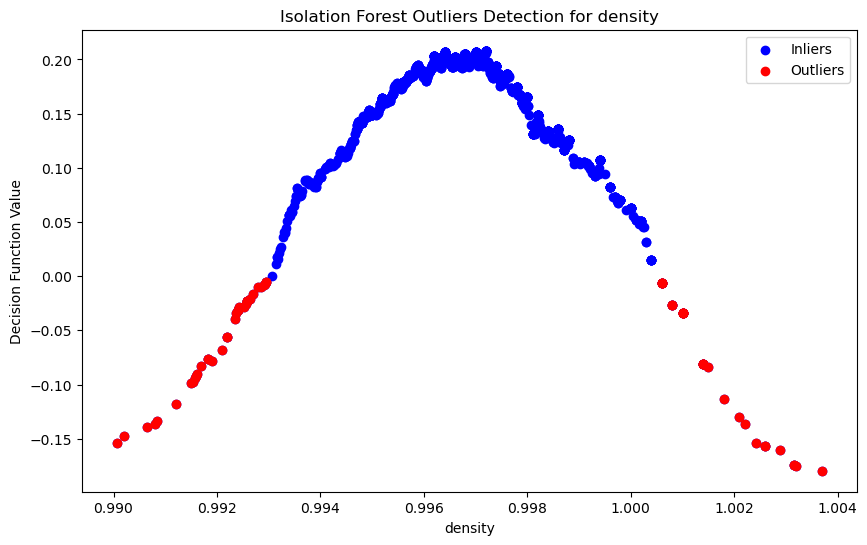

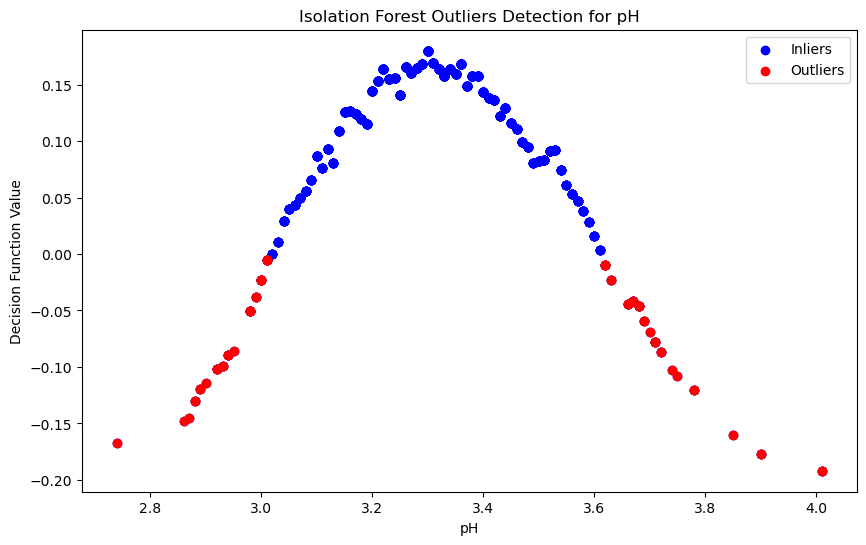

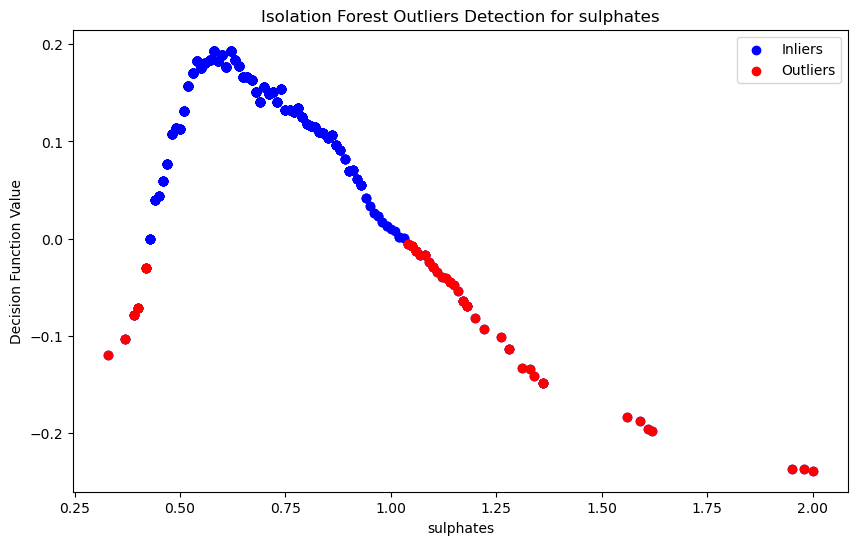

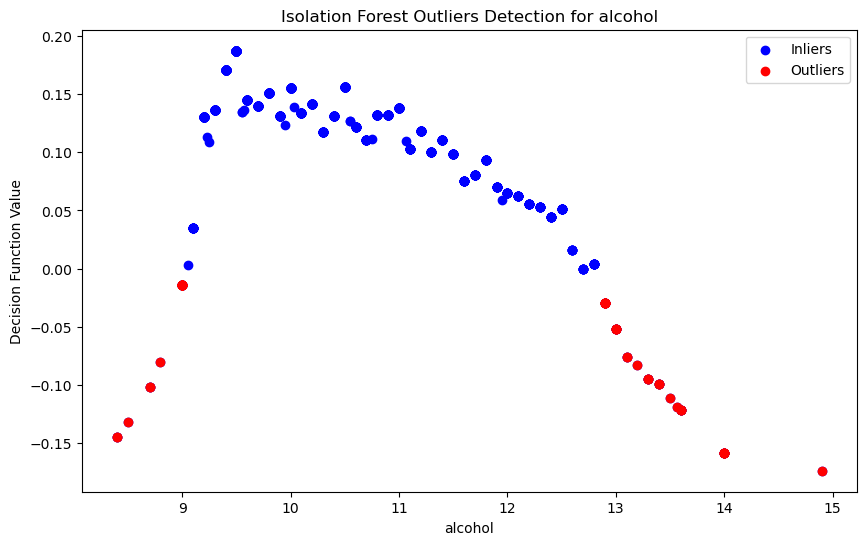

In [5]:
# 각 독립변수에 대한 이상치를 산점도로 나타내기
for column in df.columns[:-1]:
    X = df[[column]].values
    clf.fit(X)
    outliers[column] = clf.predict(X)
    inliers[column] = clf.decision_function(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X, inliers[column], c='blue', label='Inliers')
    plt.scatter(X[outliers[column] == -1], inliers[column][outliers[column] == -1], c='red', label='Outliers')
    plt.title(f"Isolation Forest Outliers Detection for {column}")
    plt.xlabel(column)
    plt.ylabel("Decision Function Value")
    plt.legend()
    plt.show()

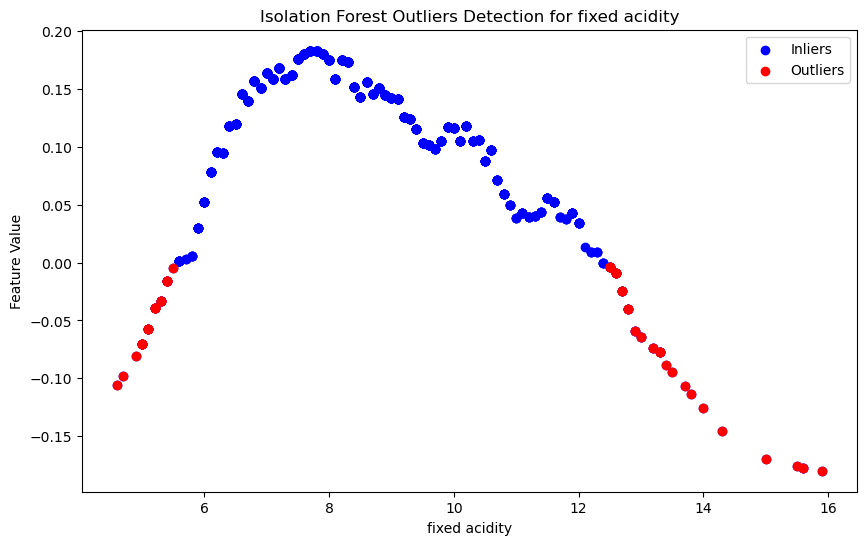

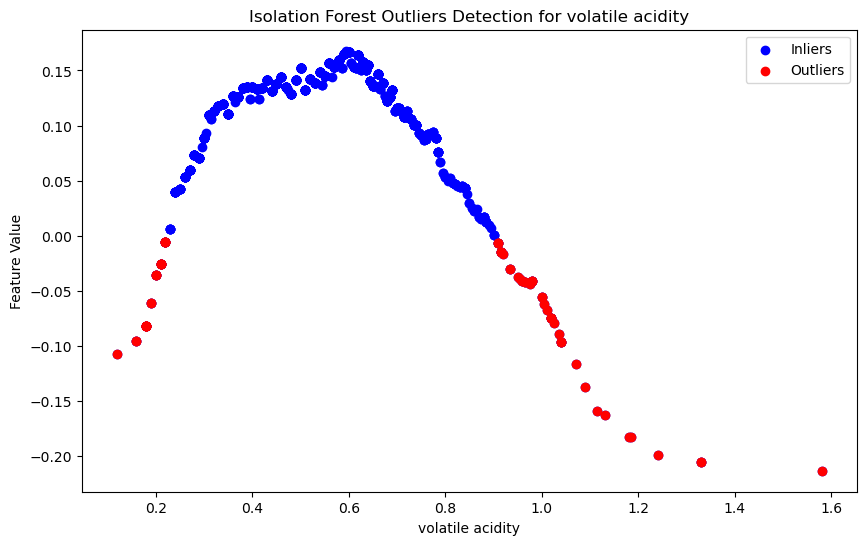

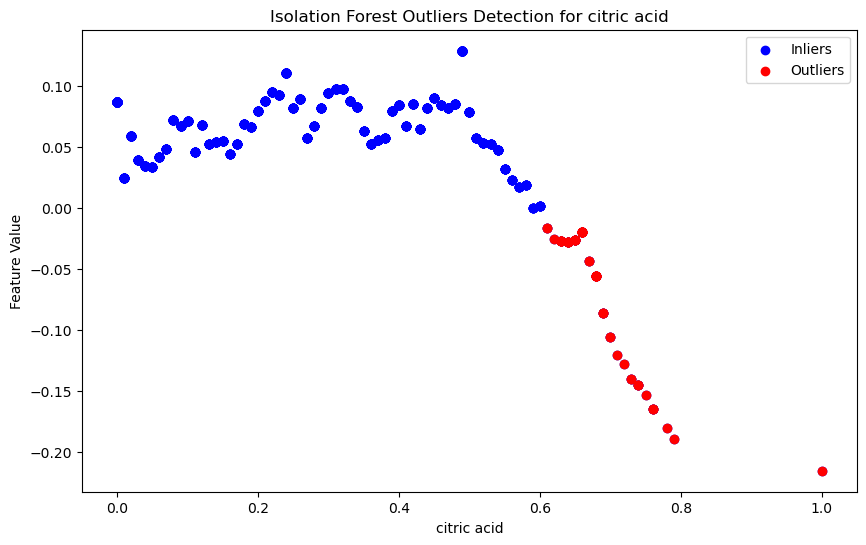

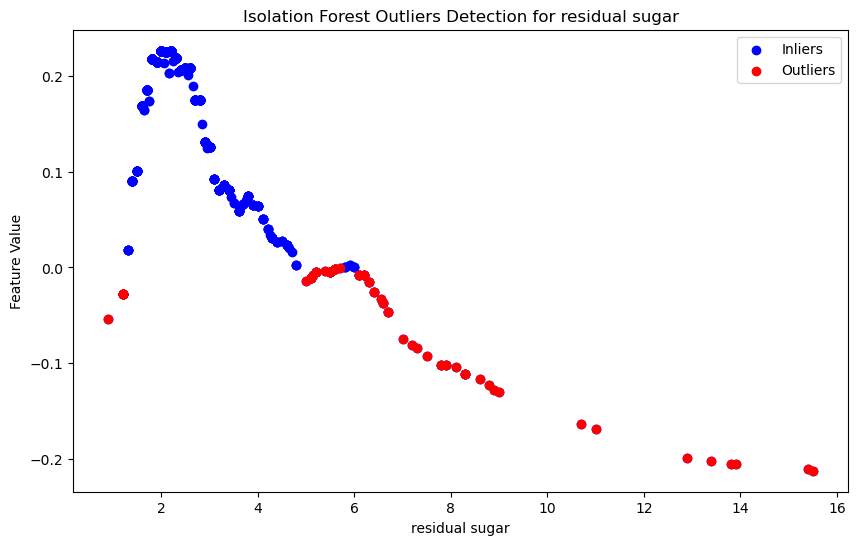

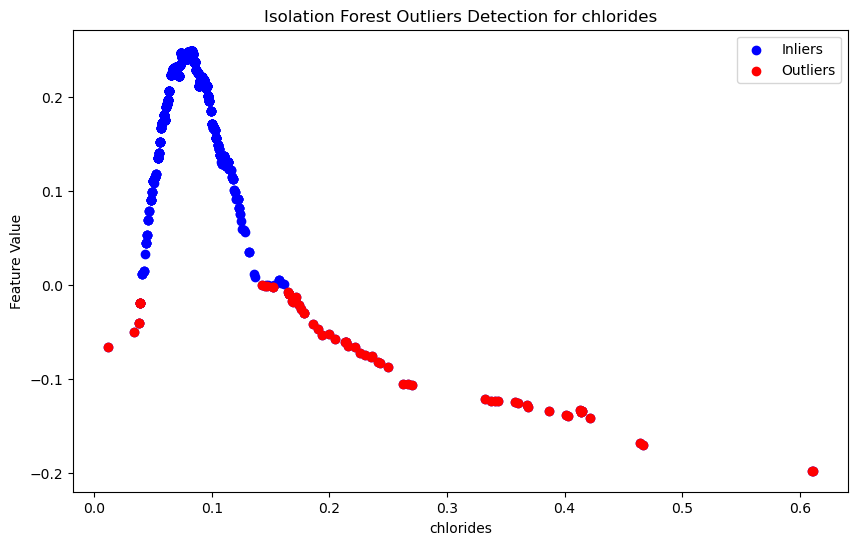

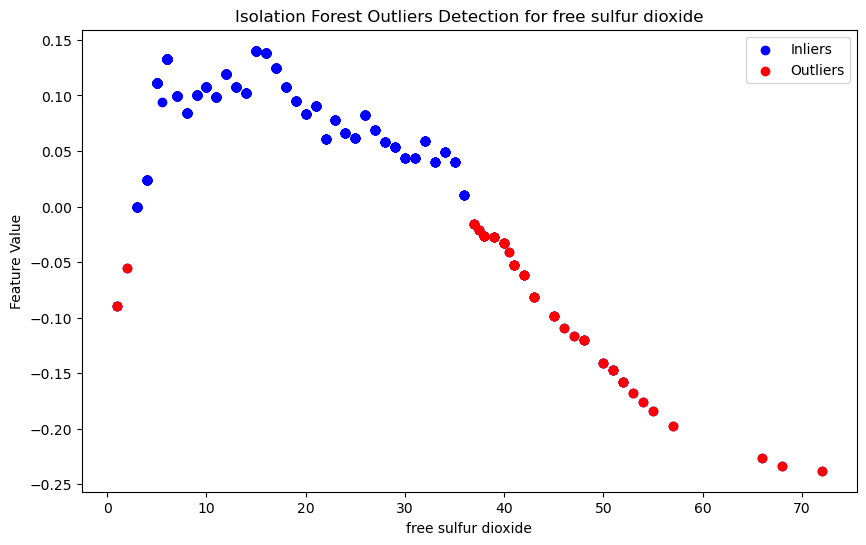

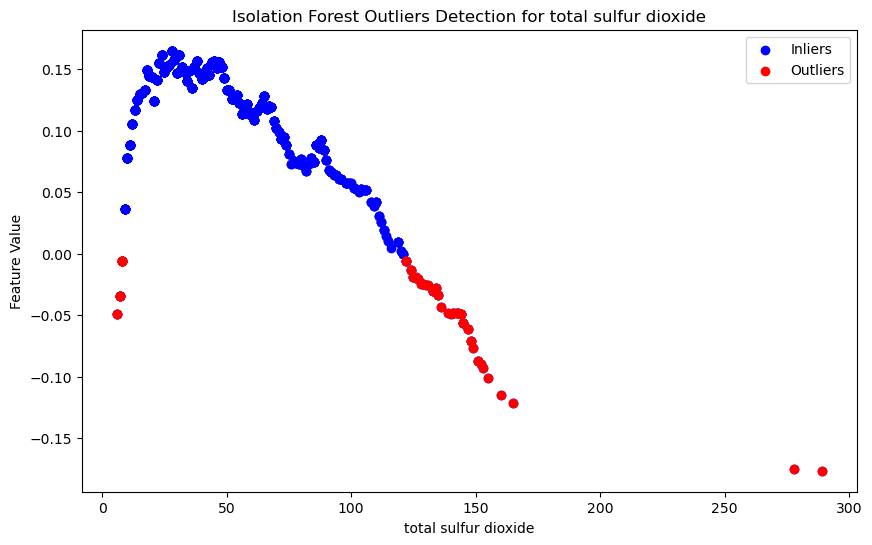

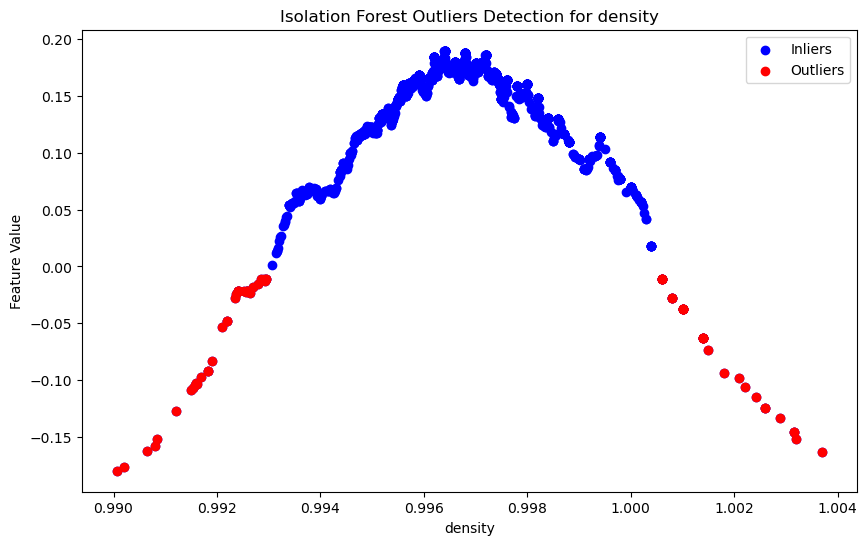

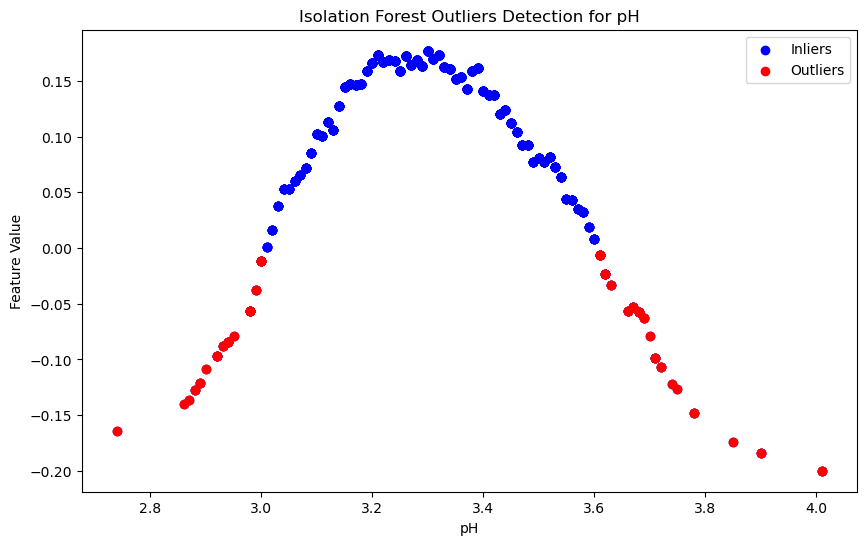

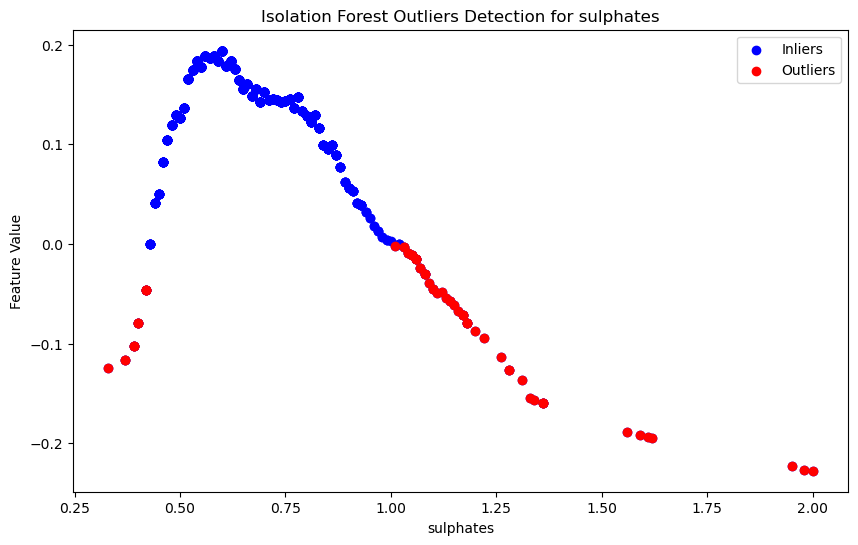

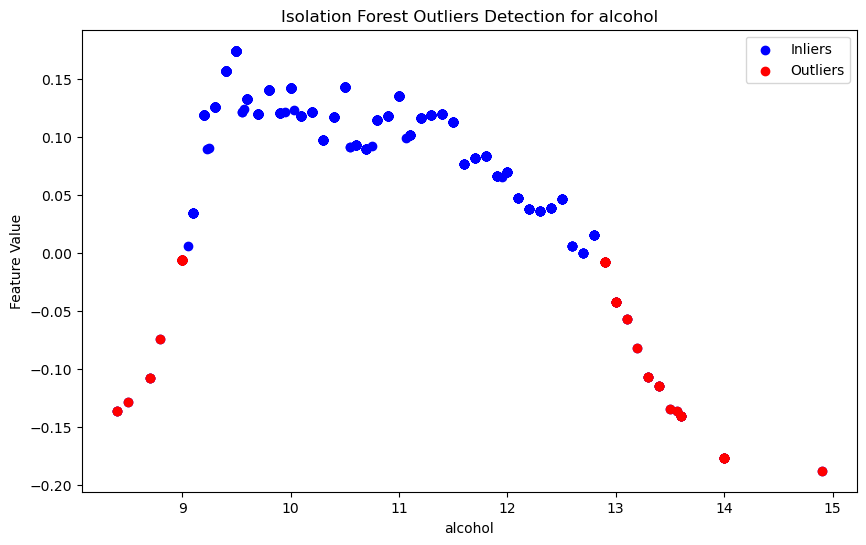

In [2]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(contamination=0.1) # contamonation
iforest.fit(df.loc[:,:'quality'])
pred = iforest.predict(df.loc[:,:'quality'])
pred
# -1로 보이는 값이 이상치, 1이 정상데이터로 판별된 것이다.

array([1, 1, 1, ..., 1, 1, 1])

In [3]:
n_errors = np.sum(pred != np.ones(200, dtype=int))
n_errors

C:\Users\leeyh\AppData\Local\Temp\ipykernel_19956\3886774389.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  n_errors = np.sum(pred != np.ones(200, dtype=int))


1

In [4]:
outlier_index = []
for i in range(len(pred)) :
    if pred[i] == -1 :
        outlier_index.append(i)

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Isolation Forest 모델 생성 및 학습
X = df.iloc[:, :-1]  # 독립변수
clf = IsolationForest(random_state=42)
clf.fit(X)

# 이상치 탐지 (predict 메서드 사용)
outliers = clf.predict(X)
df['is_outlier'] = outliers  # 이상치 여부를 나타내는 열 추가

# 이상치가 있는 행들을 출력하면서 이상치가 발생한 독립변수 출력
outlier_rows = df[df['is_outlier'] == -1]
print("이상치가 있는 행들:")
outlier_rows[['quality', 'is_outlier'] + list(df.columns[:-2])] # target, is_outlier 및 독립변수 열 출력


이상치가 있는 행들:


,quality,is_outlier,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
14,5,-1,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.200000
15,5,-1,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.200000
17,5,-1,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.300000
19,6,-1,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.200000
33,6,-1,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,7,-1,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667
1477,7,-1,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.600000
1558,5,-1,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.500000
1570,6,-1,6.4,0.360,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.400000


In [6]:
#중복
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#데이터 불러오기
df = pd.read_csv('winequality-red.csv')

# 중복된 데이터 제거
df = df.drop_duplicates()

# Isolation Forest 모델 생성 및 학습
X = df.iloc[:, :-1]  # 독립변수
y = df['quality']  # 종속변수
clf = IsolationForest(random_state=42)
clf.fit(X)

# 각 독립변수와 종속변수 간 이상치 개수 계산
outliers_by_feature = pd.DataFrame(index=X.columns)
outliers_by_feature['Outliers'] = [np.sum((clf.predict(X) == -1) & (y == i)) for i in range(11)]

# 결과 출력
print("각 독립변수와 종속변수 간 이상치 개수:")
outliers_by_feature

각 독립변수와 종속변수 간 이상치 개수:


,Outliers
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,1
chlorides,5
free sulfur dioxide,59
total sulfur dioxide,39
density,24
pH,7
sulphates,0


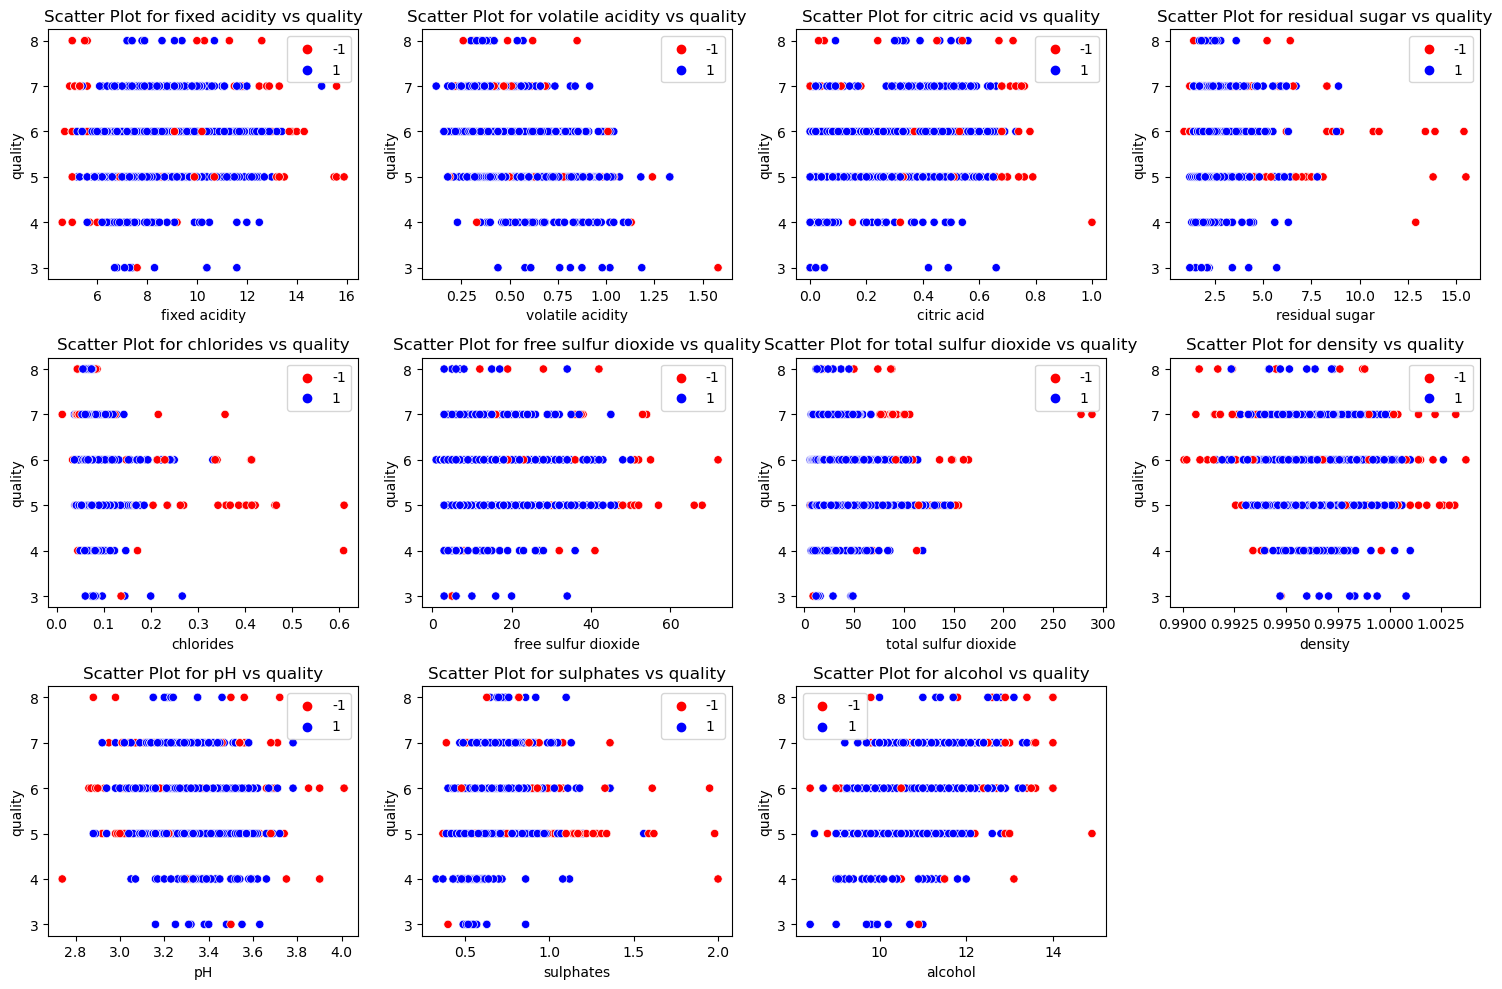

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Isolation Forest 모델 생성 및 학습
X = df.iloc[:, :-1]  # 독립변수
y = df['quality']  # 종속변수
clf = IsolationForest(random_state=42)
outliers = clf.fit_predict(X)

# 산점도 그리기
plt.figure(figsize=(15, 10))

for i, feature in enumerate(X.columns):
    plt.subplot(3, 4, i+1)  # 3x4 subplot 그리기
    sns.scatterplot(x=feature, y='quality', data=df, hue=outliers, palette={-1: 'red', 1: 'blue'}, marker='o')
    plt.title(f'Scatter Plot for {feature} vs quality')
    plt.xlabel(feature)
    plt.ylabel('quality')
    plt.legend()

plt.tight_layout()
plt.show()